In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from Optimizer import RMSProp
import matplotlib.pyplot as plt
tf.compat.v1.enable_eager_execution()

# Quadratic function

Here we minimize $f(x, y) = 100 x^2 + 2 y^2$

In [10]:
repeat_n_times = 20
learning_rates = [1, 0.1, 0.01, 0.001]
seeds = [i for i in range(1000, 1000 + repeat_n_times)]
results = []
for learning_rate in learning_rates:
    print(f"Evaluating learning_rate = {learning_rate}")
    for seed in tqdm(seeds):
        rng = np.random.default_rng(seed=seed)
        minimizers = {
            "RMSProp": RMSProp.RMSProp(learning_rate=learning_rate),
            "SGD": tf.keras.optimizers.SGD(learning_rate),
            "ADAM": tf.keras.optimizers.Adam(learning_rate)
        }
        x_0 = rng.uniform(-5, 5)
        y_0 = rng.uniform(-5, 5)
        for minimizer_name, minimizer in minimizers.items():
            x = tf.Variable(x_0)
            y = tf.Variable(y_0)
            target_fn = lambda: 100 * x * x + 2 * y * y
            n_iter = 0
            did_converge = True
            while abs(target_fn() - 0) >= 0.01:
                n = minimizer.minimize(target_fn, var_list=[x, y])
                n_iter += 1
                if n_iter > 10_000:
                    did_converge = False
                    break

            results += [{
                "x_0": x_0,
                "y_0": y_0,
                "seed": seed,
                "learning_rate": learning_rate,
                "minimizer": minimizer_name,
                "n_iter": n_iter,
                "did_converge": did_converge
            }]

results = pd.DataFrame(results)

Evaluating learning_rate = 1


100%|██████████| 20/20 [02:48<00:00,  8.44s/it]


Evaluating learning_rate = 0.1


100%|██████████| 20/20 [00:09<00:00,  2.17it/s]


Evaluating learning_rate = 0.01


100%|██████████| 20/20 [07:45<00:00, 23.25s/it]


Evaluating learning_rate = 0.001


100%|██████████| 20/20 [07:53<00:00, 23.69s/it]


In [11]:
results

,x_0,y_0,seed,learning_rate,minimizer,n_iter,did_converge
0,0.213857,1.038418,1000,1.000,RMSProp,5,True
1,0.213857,1.038418,1000,1.000,SGD,19,True
2,0.213857,1.038418,1000,1.000,ADAM,41,True
3,1.125949,-4.842995,1001,1.000,RMSProp,10001,False
4,1.125949,-4.842995,1001,1.000,SGD,18,True
...,...,...,...,...,...,...,...
235,0.939754,-0.450409,1018,0.001,SGD,462,True
236,0.939754,-0.450409,1018,0.001,ADAM,2070,True
237,-2.830731,-1.040050,1019,0.001,RMSProp,2860,True
238,-2.830731,-1.040050,1019,0.001,SGD,671,True


In [12]:
results.to_csv("quadratic_function_results.csv")

## Visualization

In [ ]:
learning_rate = 0.001
minimizers = {
    "RMSProp": RMSProp.RMSProp(learning_rate=learning_rate),
    "SGD": tf.keras.optimizers.SGD(learning_rate),
    "ADAM": tf.keras.optimizers.Adam(learning_rate)
}
x_n = []
for minimizer_name, minimizer in minimizers.items():
    x = tf.Variable(2.0)
    y = tf.Variable(5.0)
    target_fn = lambda: 100 * x * x + 2 * y * y
    n_iter = 0
    while abs(target_fn() - 0) >= 0.1:
        n = minimizer.minimize(target_fn, var_list=[x, y])
        n_iter += 1
        x_n += [{
            'x': x.numpy(),
            'y': y.numpy(),
            'minimizer': minimizer_name
        }]
        if n_iter > 2000:
            break


x_n = pd.DataFrame(x_n)

In [3]:
xlist = np.linspace(-6.0, 6.0, 100)
ylist = np.linspace(-6.0, 6.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 100 * X * X + 2 * Y * Y

<AxesSubplot:xlabel='x', ylabel='y'>

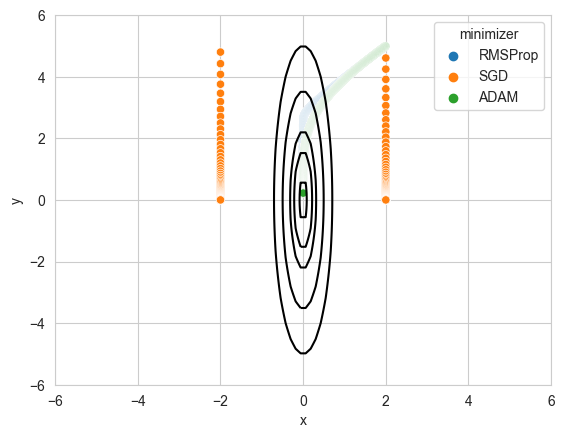

In [4]:
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=[0, 0.1, 1, 5, 10, 25, 50], colors="black")
sns.scatterplot(x_n, x="x", y="y", hue="minimizer")

# Mixture of steep and flat function

$f(x, y) = \begin{cases}
x^2 + y^2 - 9, x\in(-\infty, -3.01) \cup (3, \infty) \\
-0.01x + y^2 + 0.03, x\in[-3.01, 3]
\end{cases}$

In [147]:
repeat_n_times = 20
learning_rates = [0.1, 0.01, 0.001]
seeds = [i for i in range(1000, 1000 + repeat_n_times)]
results = []

def target_fn():
    if x < -3.01:
        return x * x - 9 + y * y
    elif x < 3:
        return -0.01 * x + 0.03 + y * y
    else:
        return x * x - 9 + y * y

for learning_rate in learning_rates:
    print(f"Evaluating learning_rate = {learning_rate}")
    for seed in tqdm(seeds):
        rng = np.random.default_rng(seed=seed)
        minimizers = {
            "RMSProp": RMSProp.RMSProp(learning_rate=learning_rate),
            "SGD": tf.keras.optimizers.SGD(learning_rate),
            "ADAM": tf.keras.optimizers.Adam(learning_rate)
        }
        x_0 = rng.uniform(-5, -2)
        y_0 = rng.uniform(-5, 5)
        for minimizer_name, minimizer in minimizers.items():
            x = tf.Variable(x_0)
            y = tf.Variable(y_0)
            n_iter = 0
            did_converge = True
            while abs(target_fn() - 0) >= 0.001:
                n = minimizer.minimize(target_fn, var_list=[x, y])
                n_iter += 1
                if n_iter > 10_000:
                    did_converge = False
                    break

            results += [{
                "x_0": x_0,
                "y_0": y_0,
                "seed": seed,
                "learning_rate": learning_rate,
                "minimizer": minimizer_name,
                "n_iter": n_iter,
                "did_converge": did_converge
            }]

results = pd.DataFrame(results)

Evaluating learning_rate = 0.1


100%|██████████| 20/20 [14:40<00:00, 44.00s/it]


Evaluating learning_rate = 0.01


100%|██████████| 20/20 [15:25<00:00, 46.27s/it]


Evaluating learning_rate = 0.001


100%|██████████| 20/20 [22:42<00:00, 68.11s/it]


In [148]:
results.to_csv("flat_function_results.csv")

In [186]:
results.groupby(["minimizer", "learning_rate"]).agg("mean")[["n_iter","did_converge"]]

n_iter  did_converge
minimizer learning_rate                        
ADAM      0.001           9636.15           0.1
          0.010           7790.15           1.0
          0.100           2204.30           1.0
RMSProp   0.001           6993.95           1.0
          0.010            781.55           1.0
          0.100           9010.75           0.1
SGD       0.001          10001.00           0.0
          0.010          10001.00           0.0
          0.100           5505.35           1.0

<AxesSubplot:xlabel='learning_rate', ylabel='n_iter'>

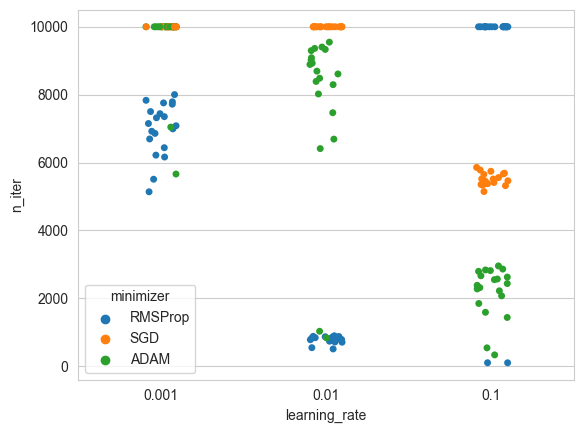

In [182]:
sns.stripplot(results, x="learning_rate", hue="minimizer", y="n_iter")

## Visualizations

In [140]:
def function(x: np.array, y):
    x_func = np.vectorize(lambda x: x*x - 9 if x < -3.01 or x > 3 else -0.01 * x + 0.03)
    x_part = x_func(x)
    return x_part + y * y


xlist = np.linspace(-6.0, 6.0, 100)
ylist = np.linspace(-6.0, 6.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = function(X, Y)


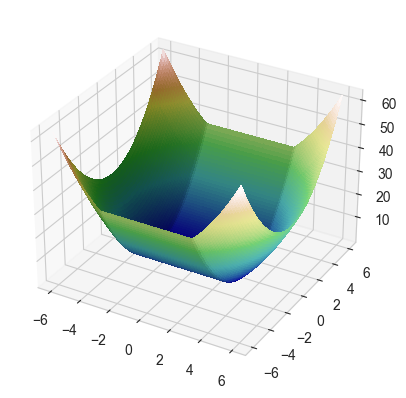

In [141]:
from matplotlib import cm
from matplotlib.colors import LightSource

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
rgb = ls.shade(Z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [153]:
def target_fn():
    if x < -3.01:
        return x * x - 9 + y * y
    elif x < 3:
        return -0.01 * x + 0.03 + y * y
    else:
        return x * x - 9 + y * y

learning_rate = 0.1
minimizers = {
    "RMSProp": RMSProp.RMSProp(learning_rate=learning_rate),
    "SGD": tf.keras.optimizers.SGD(learning_rate),
    "ADAM": tf.keras.optimizers.Adam(learning_rate)
}


x_n = []
for minimizer_name, minimizer in minimizers.items():
    x = tf.Variable(-5.0)
    y = tf.Variable(5.0)
    n_iter = 0
    while abs(target_fn() - 0) >= 0.001:
        n = minimizer.minimize(target_fn, var_list=[x, y])
        n_iter += 1
        x_n += [{
            'x': x.numpy(),
            'y': y.numpy(),
            'n': n_iter,
            'minimizer': minimizer_name
        }]
        if n_iter > 10_000:
            break

In [154]:
x_n = pd.DataFrame(x_n)
x_n.tail(1)

,x,y,n,minimizer
18419,2.901587,2.802597e-45,2955,ADAM


<AxesSubplot:xlabel='x', ylabel='y'>

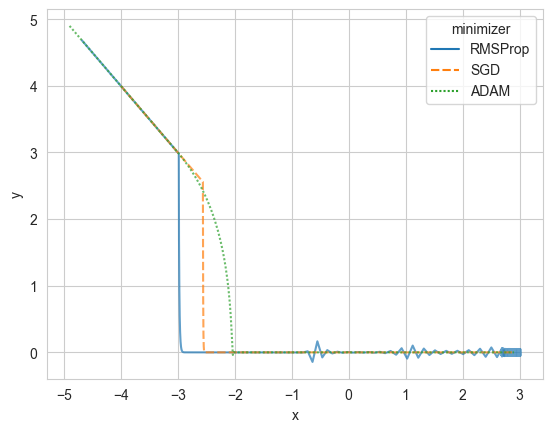

In [190]:
fig, ax = plt.subplots()
# ax.contour(X, Y, Z, levels=[0, 0.05, 0.1, 1, 5, 10, 25, 50], colors="black", alpha=0.2)
sns.lineplot(x_n, x="x", y="y", hue="minimizer", alpha=0.7, style='minimizer', ax=ax)

In [5]:
 with tf.GradientTape() as g:
    g.watch(x)
    g.watch(y)
    t= target_fn()
    gradients = g.gradient(t, sources=[x, y])
    print(gradients) # 12, 20

[<tf.Tensor: id=177489, shape=(), dtype=float32, numpy=0.00028734957>, <tf.Tensor: id=177490, shape=(), dtype=float32, numpy=0.89035296>]
